In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 14 13:43:36 2017
@author: Ed Marotta
"""
import sys, argparse, csv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab
from matplotlib.colors import ListedColormap

#df = pd.read_csv('Report_Coefficients01232018.csv', header=1)
xls = pd.ExcelFile('IntervalUsage_MLBookChapter4_19.xls')
df1 = pd.read_excel(xls, 'IntervalUsage_Nov2017', header=0)

In [2]:
print(df1.dtypes)
df1.head()

USAGE_DATE          datetime64[ns]
USAGE_START_TIME            object
USAGE_END_TIME              object
USAGE_KWH                  float64
ESTIMATED_ACTUAL            object
Year                         int64
Months                       int64
Day                          int64
Hour                         int64
Minutes                      int64
TIME                        object
HLTemp                       int64
DLTemp                       int64
DATemp                     float64
DDs                        float64
dtype: object


USAGE_DATE USAGE_START_TIME USAGE_END_TIME  USAGE_KWH ESTIMATED_ACTUAL  \
0 2017-11-01            00:00          00:15      0.317                A   
1 2017-11-01            00:15          00:30      0.129                A   
2 2017-11-01            00:30          00:45      0.101                A   
3 2017-11-01            00:45          01:00      0.122                A   
4 2017-11-01            01:00          01:15      0.676                A   

   Year  Months  Day  Hour  Minutes              TIME  HLTemp  DLTemp  DATemp  \
0  2017      11    1     0       15  11-01-2017 00:15      81      67    74.0   
1  2017      11    1     0       30  11-01-2017 00:30      81      67    74.0   
2  2017      11    1     0       45  11-01-2017 00:45      81      67    74.0   
3  2017      11    1     1        0  11-01-2017 01:00      81      67    74.0   
4  2017      11    1     1       15  11-01-2017 01:15      81      67    74.0   

   DDs  
0 -6.0  
1 -6.0  
2 -6.0  
3 -6.0  
4 -6.0

In [3]:
import dataframe_image as dfi
dfi.export(df1, 'MLChapter4.png', max_rows=30,
                max_cols=10,)

In [4]:
usage_vals = df1['USAGE_KWH'].values
usage_vals = usage_vals.astype(float)
month_vals = df1['Months'].values
month_vals = month_vals.astype(float)
day_vals = df1['Day'].values
day_vals = day_vals.astype(float)
hour_vals = df1['Hour'].values
hour_vals = hour_vals.astype(float)
minutes_vals = df1['Minutes'].values
minutes_vals = minutes_vals.astype(float)
DDs_vals = df1['DDs'].values
DDs_vals = DDs_vals.astype(float)
DHT_vals = df1['HLTemp'].values 
DHT_vals = DHT_vals.astype(float)
DLT_vals = df1['DLTemp'].values
DLT_vals = DLT_vals.astype(float)
DAT_vals = df1['DATemp'].values
DAT_vals = DAT_vals.astype(float)

In [5]:
df1['USAGE_Label']=df1['USAGE_KWH'].apply(lambda value: 1
                                                    if value <=0.25 else 2
                                                    if value <=2.0 else 3)
# Mean values if dataframe
metrics = df1.mean()
print(metrics)

# max of the specific column
maxi = df1.loc[:,"USAGE_KWH"].max()
mini = df1.loc[:,"USAGE_KWH"].min()
med = df1.loc[:,"USAGE_KWH"].median()
print(maxi)
print(mini)
print(med)

USAGE_KWH         0.249319
Year           2017.000000
Months           11.000000
Day              15.485437
Hour             11.485784
Minutes          22.500000
HLTemp           77.914008
DLTemp           56.524272
DATemp           67.219140
DDs               0.780860
USAGE_Label       1.326630
dtype: float64
2.148
0.05
0.18


In [6]:
print(df1.dtypes)
df1.head(20)

USAGE_DATE          datetime64[ns]
USAGE_START_TIME            object
USAGE_END_TIME              object
USAGE_KWH                  float64
ESTIMATED_ACTUAL            object
Year                         int64
Months                       int64
Day                          int64
Hour                         int64
Minutes                      int64
TIME                        object
HLTemp                       int64
DLTemp                       int64
DATemp                     float64
DDs                        float64
USAGE_Label                  int64
dtype: object


USAGE_DATE USAGE_START_TIME USAGE_END_TIME  USAGE_KWH ESTIMATED_ACTUAL  \
0  2017-11-01            00:00          00:15      0.317                A   
1  2017-11-01            00:15          00:30      0.129                A   
2  2017-11-01            00:30          00:45      0.101                A   
3  2017-11-01            00:45          01:00      0.122                A   
4  2017-11-01            01:00          01:15      0.676                A   
5  2017-11-01            01:15          01:30      0.732                A   
6  2017-11-01            01:30          01:45      0.563                A   
7  2017-11-01            01:45          02:00      0.181                A   
8  2017-11-01            02:00          02:15      0.196                A   
9  2017-11-01            02:15          02:30      0.194                A   
10 2017-11-01            02:30          02:45      0.167                A   
11 2017-11-01            02:45          03:00      0.191                A   
12 2017-11-01            03:00          03:15      0.196                A   
13 2017-11-01            03:15          03:30      0.105                A   
14 2017-11-01            03:30          03:45      0.050                A   
15 2017-11-01            03:45          04:00      0.081                A   
16 2017-11-01            04:00          04:15      0.074                A   
17 2017-11-01            04:15          04:30      0.061                A   
18 2017-11-01            04:30          04:45      0.066                A   
19 2017-11-01            04:45          05:00      0.069                A   

    Year  Months  Day  Hour  Minutes              TIME  HLTemp  DLTemp  \
0   2017      11    1     0       15  11-01-2017 00:15      81      67   
1   2017      11    1     0       30  11-01-2017 00:30      81      67   
2   2017      11    1     0       45  11-01-2017 00:45      81      67   
3   2017      11    1     1        0  11-01-2017 01:00      81      67   
4   2017      11    1     1       15  11-01-2017 01:15      81      67   
5   2017      11    1     1       30  11-01-2017 01:30      81      67   
6   2017      11    1     1       45  11-01-2017 01:45      81      67   
7   2017      11    1     2        0  11-01-2017 02:00      81      67   
8   2017      11    1     2       15  11-01-2017 02:15      81      67   
9   2017      11    1     2       30  11-01-2017 02:30      81      67   
10  2017      11    1     2       45  11-01-2017 02:45      81      67   
11  2017      11    1     3        0  11-01-2017 03:00      81      67   
12  2017      11    1     3       15  11-01-2017 03:15      81      67   
13  2017      11    1     3       30  11-01-2017 03:30      81      67   
14  2017      11    1     3       45  11-01-2017 03:45      81      67   
15  2017      11    1     4        0  11-01-2017 04:00      81      67   
16  2017      11    1     4       15  11-01-2017 04:15      81      67   
17  2017      11    1     4       30  11-01-2017 04:30      81      67   
18  2017      11    1     4       45  11-01-2017 04:45      81      67   
19  2017      11    1     5        0  11-01-2017 05:00      81      67   

    DATemp  DDs  USAGE_Label  
0     74.0 -6.0            2  
1     74.0 -6.0            1  
2     74.0 -6.0            1  
3     74.0 -6.0            1  
4     74.0 -6.0            2  
5     74.0 -6.0            2  
6     74.0 -6.0            2  
7     74.0 -6.0            1  
8     74.0 -6.0            1  
9     74.0 -6.0            1  
10    74.0 -6.0            1  
11    74.0 -6.0            1  
12    74.0 -6.0            1  
13    74.0 -6.0            1  
14    74.0 -6.0            1  
15    74.0 -6.0            1  
16    74.0 -6.0            1  
17    74.0 -6.0            1  
18    74.0 -6.0            1  
19    74.0 -6.0            1

In [7]:
df_stat = df1.describe()
dfi.export(df_stat, 'Statistics.png', max_rows=30,
                max_cols=10,)
df_stat.describe()

USAGE_KWH         Year       Months          Day         Hour  \
count     8.000000     8.000000     8.000000     8.000000     8.000000   
mean    360.907571  1873.250000   368.750000   373.143150   369.801862   
std    1019.483529   815.446022  1016.321764  1014.579667  1015.914268   
min       0.050000     0.000000     0.000000     1.000000     0.000000   
25%       0.159750  2017.000000    11.000000     8.494821     6.446836   
50%       0.241285  2017.000000    11.000000    15.242718    11.242892   
75%       0.762750  2017.000000    11.000000    24.750000    18.500000   
max    2884.000000  2884.000000  2884.000000  2884.000000  2884.000000   

           Minutes       HLTemp       DLTemp       DATemp          DDs  \
count     8.000000     8.000000     8.000000     8.000000     8.000000   
mean    379.471677   419.903056   404.166574   411.607851   362.553066   
std    1012.073575   995.977870  1002.190519   999.241601  1018.858676   
min       0.000000     7.310436    10.808318     8.643667   -13.000000   
25%      15.392564    71.000000    45.500000    58.000000    -1.039355   
50%      22.500000    78.457004    55.762136    66.359570     5.250000   
75%      36.562500    85.250000    68.750000    76.125000    10.482750   
max    2884.000000  2884.000000  2884.000000  2884.000000  2884.000000   

       USAGE_Label  
count     8.000000  
mean    361.724646  
std    1019.153446  
min       0.470538  
25%       1.000000  
50%       1.163315  
75%       2.250000  
max    2884.000000

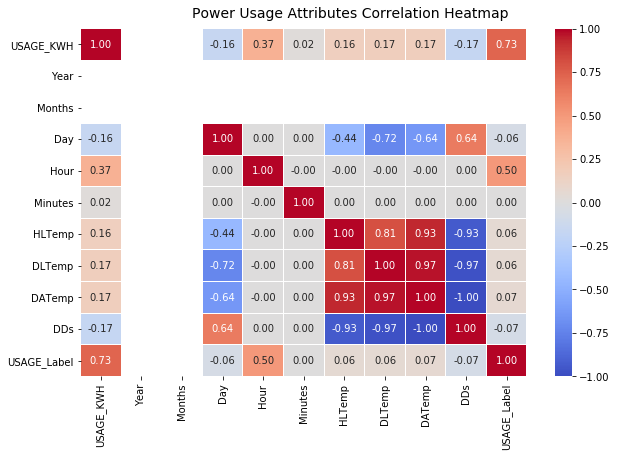

In [8]:
import seaborn as sns
# Correlation Matrix with HeatMap
f, ax = plt.subplots(figsize=(10, 6))
corr = df1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Power Usage Attributes Correlation Heatmap', fontsize=14)
f.savefig('heatmap.png')

In [9]:
# Label Column (target values) for classification
y_label = df1['USAGE_Label']

# Preparing the arrays for training...
X_features = [day_vals, hour_vals, minutes_vals, DDs_vals, DHT_vals, DLT_vals, DAT_vals]
X_featuresA = np.array(X_features)
X_features_T = np.transpose(X_featuresA)

In [10]:
# Spliting into training and test samples                        
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features_T, y_label, test_size = 0.2, random_state = 0)

# Standardizing/Scaling feature values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_train = y_train.values.reshape( (len(y_train),) )
y_test = y_test.values.reshape( (len(y_test),) )

In [11]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', splitter='best', max_depth = 10, random_state=0)
tree.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [12]:
# Number of misclassification from the prediction model
y_pred = tree.predict(X_test_std)
print('Misclassifed DT_Sliding samples: %.2f' % (y_test != y_pred).sum())
print('----------------------------------------------------------')

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('----------------------------------------------------------')

Misclassifed DT_Sliding samples: 78.00
----------------------------------------------------------
Accuracy: 0.865
----------------------------------------------------------


In [13]:
# Listing the feature importances
print('day_vals, hour_vals, minutes_vals, DDs_vals, DHT_vals, DLT_vals, DAT_vals')
print(tree.feature_importances_)

day_vals, hour_vals, minutes_vals, DDs_vals, DHT_vals, DLT_vals, DAT_vals
[0.13639669 0.53481299 0.09455431 0.01898241 0.08876299 0.06101969
 0.06547092]


In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', max_features= 'auto', n_estimators=10, random_state=1, n_jobs = -1)
forest.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#Number of misclassification from the prediction model
y_pred = forest.predict(X_test_std)
print('Misclassifed RF_Sliding samples: %.2f' % (y_test != y_pred).sum())
print('----------------------------------------------------------')

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('----------------------------------------------------------')

print(forest.feature_importances_)

Misclassifed RF_Sliding samples: 77.00
----------------------------------------------------------
Accuracy: 0.867
----------------------------------------------------------
[0.061972   0.66760389 0.10680932 0.04499768 0.03711128 0.0419842
 0.03952163]


In [15]:
from sklearn.svm import SVC
svm = SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(X_train_std, y_train)
#
y_test = y_test.reshape( (len(y_test) ,) )

#Number of misclassification from the prediction model
y_pred = svm.predict(X_test_std)
print('Misclassifed SVC_Sliding samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

Misclassifed SVC_Sliding samples: 81.00
Accuracy: 0.86
---------------------------------------------------


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski', n_jobs=-1, leaf_size=30)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassifed KNN_Binning ROPavg samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

Misclassifed KNN_Binning ROPavg samples: 94.00
Accuracy: 0.84
---------------------------------------------------


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=6, random_state=0, loss='deviance', learning_rate=0.9, n_estimators=1000, criterion='friedman_mse', max_features= 'auto')
gbc.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
#Number of misclassification from the prediction model
y_predgbc = gbc.predict(X_test_std)
print('---------------------------------------------------')
print('Misclassifed GBClassifier_Binning USAGE samples: %.2f' % (y_test != y_predgbc).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_predgbc))
print('---------------------------------------------------')

print(gbc.feature_importances_)

---------------------------------------------------
Misclassifed GBClassifier_Binning USAGE samples: 63.00
Accuracy: 0.89
---------------------------------------------------
[0.24095584 0.36927373 0.30991823 0.01626767 0.02395566 0.02771105
 0.01191782]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = GaussianNB()

In [19]:
clf1.fit(X_train_std, y_train)
y_pred = clf1.predict(X_test_std)
print('---------------------------------------------------')
print('Misclassifed LogisticRegressio_Binning USAGE samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

---------------------------------------------------
Misclassifed LogisticRegressio_Binning USAGE samples: 112.00
Accuracy: 0.81
---------------------------------------------------


In [20]:
clf2.fit(X_train_std, y_train)
y_pred = clf2.predict(X_test_std)
print('---------------------------------------------------')
print('Misclassifed Naive_Binning USAGE samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

---------------------------------------------------
Misclassifed Naive_Binning USAGE samples: 114.00
Accuracy: 0.80
---------------------------------------------------


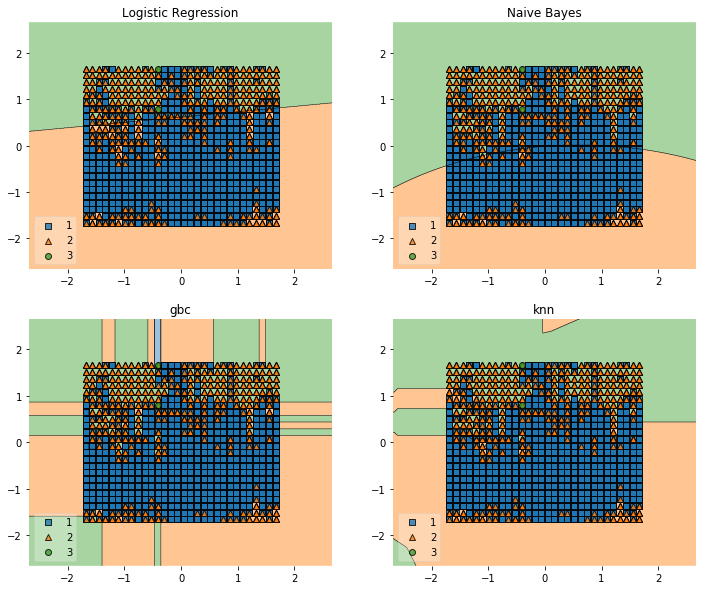

In [21]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 4)

fig = plt.figure(figsize=(25,10))
# Decision region for feature 2,3 = 1.5
value = 2.2
# Plot training sample with feature 2,3 = 1.5 +/- 0.75
width = 6
labels = ['Logistic Regression', 'Naive Bayes','gbc','knn']
for clf, lab, grd in zip([clf1, clf2, gbc, knn],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_combined, y_combined)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_combined, y=y_combined, clf=clf, legend=3,
                      filler_feature_values={2: value,3: value,4: value,5: value,6: value},
                      filler_feature_ranges={2: width,3: width,4: width,5: width,6: width},ax=ax)
    plt.title(lab)
plt.savefig('DecisionMap.png', bbox_inches="tight")
plt.show()

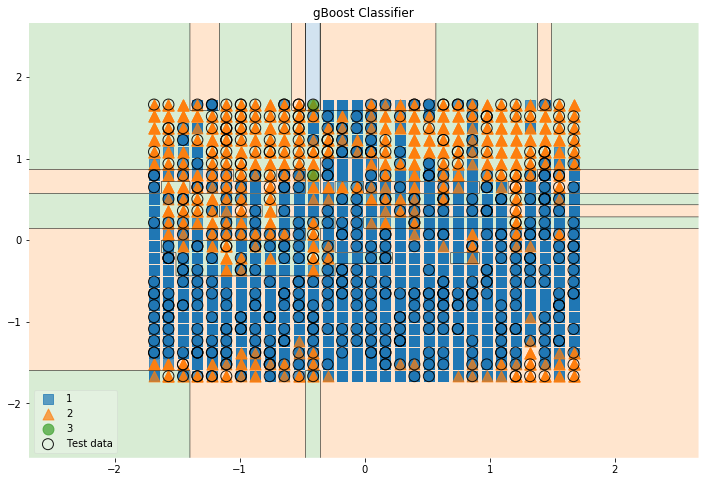

In [22]:
# Specify keyword arguments to be passed to underlying plotting functions
fig = plt.figure(figsize=(12,8))
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.9}
# Decision region for feature 2,3 = 1.5
value = 2.2
# Plot training sample with feature 2,3 = 1.5 +/- 0.75
width = 6
# Plotting decision regions
plot_decision_regions(X=X_combined, y=y_combined, clf=gbc, legend=3,
                      X_highlight=X_test_std,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      filler_feature_values={2: value,3: value,4: value,5: value,6: value},
                      filler_feature_ranges={2: width,3: width,4: width,5: width,6: width})

# Adding axes annotations
plt.title('gBoost Classifier')
plt.show()